In [167]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [168]:
df = pd.read_csv("Box_size_scc.csv")
data = df.drop(['Unnamed: 4'], axis=1)
data

,Item number,W,L,H
0,PXA2823523853001,282,352.0,385
1,PXA2255751253001,225,575.0,125
2,PXA2255751253001,225,575.0,125
3,PXA2255751253001,225,575.0,125
4,PXA1902752303022,190,275.0,230
5,PXA1601101813001,160,110.0,181
6,PXA1901901685001,190,190.0,168
7,PXA3403403205009,340,340.0,320
8,PXA3923923213001,392,392.0,321
9,PXA2501702503001,250,170.0,250


Text(0, 0.5, 'H')

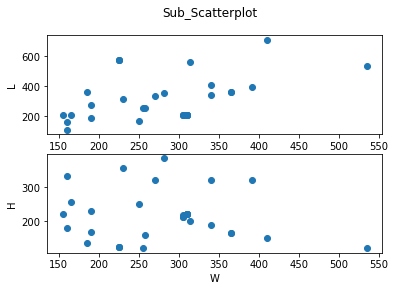

In [169]:
fig, axs = plt.subplots(2)
fig.suptitle('Sub_Scatterplot')
axs[0].scatter(df['W'],df['L'])
axs[0].set_xlabel('W')
axs[0].set_ylabel('L')

axs[1].scatter(df['W'],df['H'])
axs[1].set_xlabel('W')
axs[1].set_ylabel('H')

In [170]:
x = pd.DataFrame(np.c_[df['W'],df['L'],df['H']],columns = ["W","L", "H"])
y = df['Item number']

In [171]:
print(x,'\n')
print(y)

        W      L      H
0   282.0  352.0  385.0
1   225.0  575.0  125.0
2   225.0  575.0  125.0
3   225.0  575.0  125.0
4   190.0  275.0  230.0
5   160.0  110.0  181.0
6   190.0  190.0  168.0
7   340.0  340.0  320.0
8   392.0  392.0  321.0
9   250.0  170.0  250.0
10  305.0  205.0  212.0
11  305.0  205.0  212.0
12  305.0  205.0  218.0
13  310.0  205.0  220.0
14  310.0  210.0  220.0
15  310.0  210.0  220.0
16  310.0  210.0  220.0
17  310.0  210.0  220.0
18  155.0  210.0  220.0
19  165.0  207.0  257.0
20  535.0  535.0  120.0
21  160.0  160.0  332.0
22  410.0  710.0  150.0
23  230.0  318.0  356.0
24  270.0  335.0  320.0
25  314.0  565.1  200.0
26  365.0  365.0  165.0
27  365.0  365.0  165.0
28  185.0  360.0  135.0
29  255.0  255.0  121.0
30  258.0  258.0  160.0
31  340.0  410.0  190.0 

0     PXA2823523853001
1     PXA2255751253001
2     PXA2255751253001
3     PXA2255751253001
4     PXA1902752303022
5     PXA1601101813001
6     PXA1901901685001
7     PXA3403403205009
8     PXA3923923213001

In [172]:
kmeans = KMeans(n_clusters=3, random_state=50)
labels = kmeans.fit_predict(x)

In [173]:
db_index = davies_bouldin_score(x, labels)
print(db_index)

0.9728809070141655


In [174]:
results = {}
for i in range(2,20):
    kmeans = KMeans(n_clusters=i, random_state=50)
    labels = kmeans.fit_predict(x)
    db_index = davies_bouldin_score(x, labels)
    results.update({i: db_index})

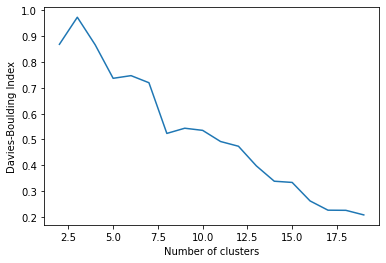

In [175]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

In [176]:
a = list(results.keys())
b = list(results.values())


In [177]:
df_DB_Index_table = pd.DataFrame({"Number of clusters":a,"Davies-Boulding Index":b})
df_DB_Index_table

,Number of clusters,Davies-Boulding Index
0,2,0.868158
1,3,0.972881
2,4,0.866004
3,5,0.736663
4,6,0.746990
5,7,0.719566
6,8,0.523476
7,9,0.543589
8,10,0.535327
9,11,0.492184


In [178]:
kmeans = KMeans(n_clusters=16, random_state=30)
labels = kmeans.fit_predict(x)
x_centroids = kmeans.cluster_centers_[:,0]
y_centroids = kmeans.cluster_centers_[:,1]
z_centroids = kmeans.cluster_centers_[:,2]

In [179]:
lg = ["Data point","centroid"]

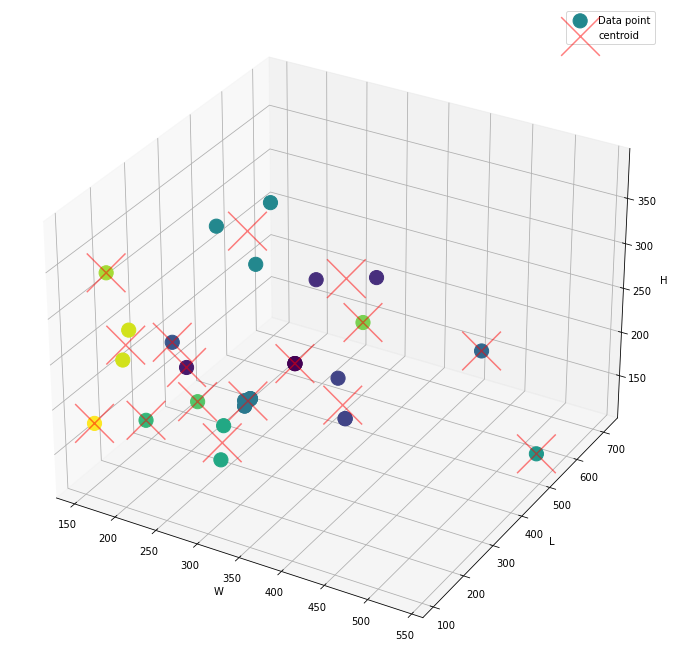

In [180]:
fig = plt.figure(figsize = (18,12))
graph = fig.add_subplot(111,projection = '3d')
graph.scatter(df.W, df.L, df.H, c =labels, s=200, alpha = 1)
graph.scatter(x_centroids,y_centroids,z_centroids,marker="x",s=1500,alpha = 0.5, c="r")
graph.set_xlabel('W')
graph.set_ylabel('L')
graph.set_zlabel('H')
graph.legend(lg)

plt.show()

In [181]:
data_group = pd.DataFrame({'Item number':data['Item number'],'W':data['W'], 'L':data['L'], 'H':data['H'], 'Group':labels})
data_group.to_csv('C:/Users/Teerawat/OneDrive/Desktop/Chanwanich/NIA_e_commerce/data/Box_size_scc_group.csv')
data_group

,Item number,W,L,H,Group
0,PXA2823523853001,282,352.0,385,7
1,PXA2255751253001,225,575.0,125,0
2,PXA2255751253001,225,575.0,125,0
3,PXA2255751253001,225,575.0,125,0
4,PXA1902752303022,190,275.0,230,4
5,PXA1601101813001,160,110.0,181,15
6,PXA1901901685001,190,190.0,168,10
7,PXA3403403205009,340,340.0,320,2
8,PXA3923923213001,392,392.0,321,2
9,PXA2501702503001,250,170.0,250,1
